In [11]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter=" ",
                   header=None, names=("date", "time", "ir", "lidar"))

In [12]:
print(data["lidar"][0:8])

0    214
1    211
2    199
3    208
4    212
5    212
6    215
7    218
Name: lidar, dtype: int64


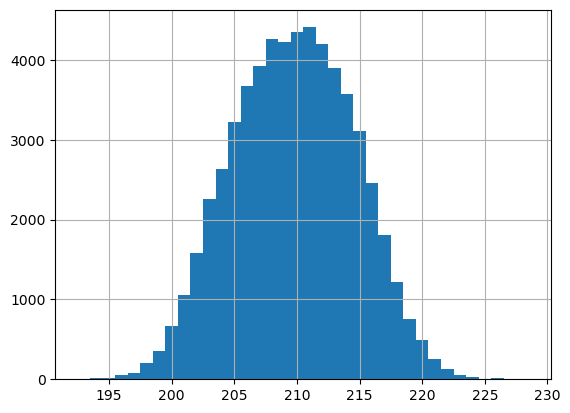

In [13]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [16]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()

print(mean1,mean2)

209.73713297619855 209.73713297619855


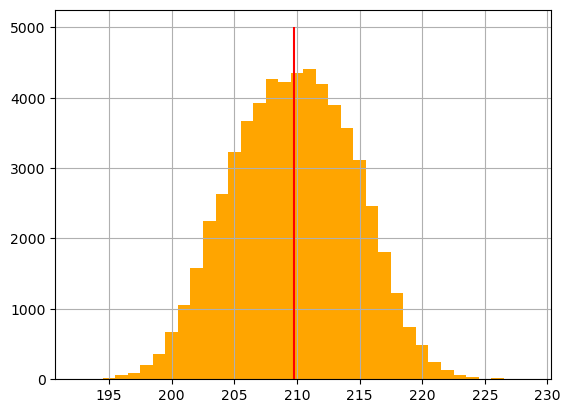

In [17]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [18]:
# 定義から計算
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z-mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))   # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof = 0)   # 標本分散
pandas_default_var = data["lidar"].var()            # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])               # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof = 1)    # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)


23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441


In [23]:
import math

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)



4.838151482774605
4.83819249292072
4.83819249292072
